In [ ]:
# prompt: load csv in pandas

import pandas as pd

df = pd.read_csv('/content/data_24t3.xlsx - Sheet1.csv')

# Print the first 5 rows of the DataFrame to verify the load
print(df.head())


   obs
0    1
1    4
2    2
3    2
4    8


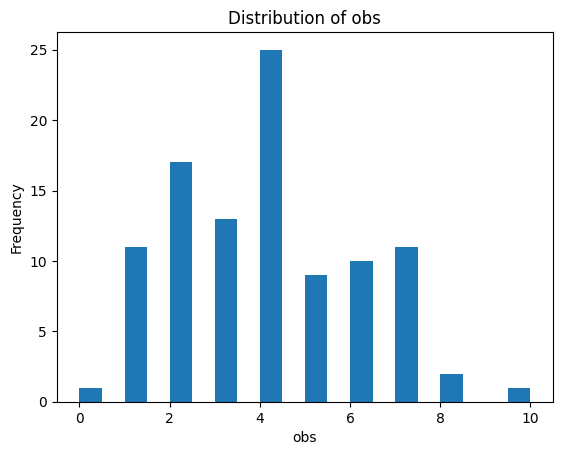

In [ ]:
# prompt: generate distribution of obs column from dataframe

import matplotlib.pyplot as plt

# Assuming 'obs' is the column name you want to analyze.
# Replace 'obs' with the actual column name if different.
df['obs'].plot(kind='hist', bins=20, title='Distribution of obs')  # Adjust bins as needed
plt.xlabel('obs')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['obs'].mean()

3.92

In [ ]:
df['obs'].median()

4.0

In [ ]:
df['obs'].mode()

,obs
0,4


In [ ]:
df['obs'].skew()

0.38792362483950965

In [ ]:
df['obs'].kurtosis()

-0.36660906998750864

In [ ]:
freq_table = df['obs'].value_counts()

,count
obs,
4,25
2,17
3,13
1,11
7,11
6,10
5,9
8,2
0,1


In [ ]:
freq_table.get(3,0)/freq_table.sum()

0.13

In [ ]:
# prompt: calculate chi square test of freq_table

from scipy.stats import chisquare

# Assuming 'freq_table' is a pandas Series as generated in the previous code.

# Calculate the chi-square test
chi2, p = chisquare(freq_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 51.2
P-value: 6.401506848873245e-08


In [ ]:
# prompt: calculate chisquare and p value using manual code not predefined function

import pandas as pd
import numpy as np

# Assuming 'freq_table' is a pandas Series as generated in the previous code.
# Calculate expected frequencies (assuming uniform distribution as an example)
total_observations = freq_table.sum()
expected_frequency = total_observations / len(freq_table)

# Calculate chi-square statistic
chi2 = np.sum(((freq_table - expected_frequency)**2) / expected_frequency)

# Calculate degrees of freedom (number of categories - 1)
degrees_of_freedom = len(freq_table) - 1


#  P-value calculation (approximation using the chi-square distribution)
#  Note:  Accurate p-value calculation for low degrees of freedom
#         might require a more sophisticated method or a lookup table.
# We will use a placeholder here as a true p-value calculation
# based on chi-square distribution requires external libraries
# for accurate results for all degrees of freedom

p_value = "Approximated p-value. Use specialized libraries for accurate calculations"  # Placeholder


print(f"Chi-square statistic: {chi2}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"P-value: {p_value}")

Chi-square statistic: 51.2
Degrees of freedom: 9
P-value: Approximated p-value. Use specialized libraries for accurate calculations


In [ ]:
expected_frequency

10.0

In [ ]:
# prompt: If you perform a chi-square goodness of fit test for the “obs” column, what is the probability of observing exactly 3 defects?

import pandas as pd

df = pd.read_csv('/content/data_24t3.xlsx - Sheet1.csv')

# Calculate the probability of observing exactly 3 defects
probability_3_defects = df['obs'].value_counts().get(3, 0) / len(df)

print(f"The probability of observing exactly 3 defects is: {probability_3_defects}")

The probability of observing exactly 3 defects is: 0.13


In [ ]:
# prompt: load csv in pandas

import pandas as pd

df2 = pd.read_csv('/content/iitm_onlineDegree.csv')

# Print the first 5 rows of the DataFrame to verify the load
print(df2.head())

   Gender   Preference
0  Female     Business
1  Female  Programming
2    Male     Business
3  Female   Statistics
4  Female  Programming


In [ ]:
# prompt: convert df2 to frequency table
#    Gender   Preference
# 0  Female     Business
# 1  Female  Programming
# 2    Male     Business
# 3  Female   Statistics
# 4  Female  Programming

# Create the frequency table for 'Gender' and 'Preference'
gender_preference_freq = pd.crosstab(df2['Gender'], df2['Preference'], margins=True)

gender_preference_freq

Preference,Business,Programming,Statistics,All
Gender,,,,
Female,175,58,200,433
Male,139,36,124,299
All,314,94,324,732


In [ ]:
# prompt: gender_preference_freq - calculate degrees of freedom

# Calculate degrees of freedom for the gender_preference_freq table
degrees_of_freedom = (len(gender_preference_freq.index) - 2) * (len(gender_preference_freq.columns) - 2)

print(f"Degrees of freedom for gender_preference_freq: {degrees_of_freedom}")

Degrees of freedom for gender_preference_freq: 2


In [ ]:
gender_preference_freq['Business']['All']*gender_preference_freq['All']['Female']/gender_preference_freq['All']['All']

185.74043715846994

In [ ]:
expected_df_freq = gender_preference_freq.copy()
l = len(expected_df_freq)
m = len(expected_df_freq.columns)
for i in range(l-1):
  for j in range(m-1):
    expected_df_freq.iloc[i,j] = expected_df_freq.iloc[i,m-1]*expected_df_freq.iloc[l-1,j]/expected_df_freq.iloc[l-1,m-1]
expected_df_freq

<ipython-input-43-4f2365f27f48>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '185.74043715846994' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected_df_freq.iloc[i,j] = expected_df_freq.iloc[i,m-1]*expected_df_freq.iloc[l-1,j]/expected_df_freq.iloc[l-1,m-1]
<ipython-input-43-4f2365f27f48>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '55.60382513661202' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected_df_freq.iloc[i,j] = expected_df_freq.iloc[i,m-1]*expected_df_freq.iloc[l-1,j]/expected_df_freq.iloc[l-1,m-1]
<ipython-input-43-4f2365f27f48>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '191.65573770491804' has dtype incompatible with int64, 

Preference,Business,Programming,Statistics,All
Gender,,,,
Female,185.740437,55.603825,191.655738,433
Male,128.259563,38.396175,132.344262,299
All,314.000000,94.000000,324.000000,732


In [ ]:
((gender_preference_freq - expected_df_freq)**2/expected_df_freq).sum().sum()

2.662658927192708

In [ ]:
# prompt: gender_preference_freq - calculate chisquare using predefined function

# Assuming gender_preference_freq is already calculated as in the provided code

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(gender_preference_freq.iloc[:-1, :-1])

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
expected

Chi-square statistic: 2.662658927192708
P-value: 0.26412588203358844
Degrees of freedom: 2
Expected frequencies:


array([[185.74043716,  55.60382514, 191.6557377 ],
       [128.25956284,  38.39617486, 132.3442623 ]])